# Mercedes-Benz Greener Manufacturing.
<pre>
DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.
</pre>
### Following actions should be performed:

<li>If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
<li>Check for null and unique values for test and train sets.
<li>Apply label encoder.
<li>Perform dimensionality reduction.
<li>Predict your test_df values using XGBoost

<h4>Importing Modules

In [1]:
import numpy as np
import pandas as pd

#Import Label Encoder / PCA / Train-Test Split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Linear Regression / Lasso Regression / Ridge Regression / XGB 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
import xgboost as xgb

#for Measuring Accuracy
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

#Import Matplot and Seaborn
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

<h4>Reading Train and Test Data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("Train shape : ", train_df.shape)
print("\n\nTrain Head\n", train_df.head())
print("\n\nTest shape : ", test_df.shape)
print("\n\nTest Head\n", test_df.head())

Train shape :  (4209, 378)


Train Head
    ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]


Test shape :  (4209, 377)


Test Head
    ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  ...  X375  X376  X377  X378  X379  X380  \
0   1  az  v   n  f  d  t  a  w    0  ...     0     0     0     1     0     0   
1   2   t  b  ai  a  d  b  g  y    0  ...     0     0     1

<h4>List Objects of Train Data

In [3]:
#List Features and Data Types of Train
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


<h4>List Constant, Binary and Categorical  features of Train Data

In [4]:
#Count the data in each of the column
cols = [c for c in train_df.columns if 'X' in c]
counts = [[], [], []]
for c in cols:
    typ = train_df[c].dtype
    uniq = len(np.unique(train_df[c]))
    if uniq == 1:
        counts[0].append(c)
    elif uniq == 2 and typ == np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)
print('Constant features: {}, Binary features: {}, Categorical features: {}\n'.format(*[len(c) for c in counts]))
print('Constant/Unique features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 12, Binary features: 356, Categorical features: 8

Constant/Unique features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


### Fetching Categorical for later user

In [5]:
categorical_objects = counts[2]
print('Categorical features:', categorical_objects)

Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


<h4>Check for Missing values in Train

In [6]:
#Missing Values
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


<h4>Check for Varince values in Train

In [7]:
#Columns with Varince = 0
train_df.var()[train_df.var()==0].index.values

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

<h4>List Objects of Test Data

In [8]:
#List Features and Data Types of Test
dtype_df_test = test_df.dtypes.reset_index()
dtype_df_test.columns = ["Count", "Column Type"]
dtype_df_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,object,8


<h4>List Constant, Binary and Categorical  features of Test Data

In [9]:
#Count the data in each of the column
cols = [c for c in test_df.columns if 'X' in c]
counts = [[], [], []]
for c in cols:
    typ = test_df[c].dtype
    uniq = len(np.unique(test_df[c]))
    if uniq == 1:
        counts[0].append(c)
    elif uniq == 2 and typ == np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)
print('Constant features: {}, Binary features: {}, Categorical features: {}\n'.format(*[len(c) for c in counts]))
print('Constant/Unique features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 5, Binary features: 363, Categorical features: 8

Constant/Unique features: ['X257', 'X258', 'X295', 'X296', 'X369']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


<h4>Check for Missing values in Test

In [10]:
#Missing Values
missing_df_test = test_df.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['column_name', 'missing_count']
missing_df_test = missing_df_test.loc[missing_df_test['missing_count']>0]
missing_df_test = missing_df_test.sort_values(by='missing_count')
missing_df_test

,column_name,missing_count


<h4>Check for Varince values in Test

In [11]:
#Columns with Varince = 0
test_df.var()[test_df.var()==0].index.values

array(['X257', 'X258', 'X295', 'X296', 'X369'], dtype=object)

<h4>Drop zero Variance variables in both Train and Test

In [12]:
train_df = train_df.drop(train_df.var()[train_df.var()==0].index.values, axis=1)
test_df = test_df.drop(test_df.var()[test_df.var()==0].index.values, axis=1)

<h4>Check and confiorm if Variance removed

In [13]:
#Listing Variance
print('Variance in Train still ? :', train_df.var()[train_df.var()==0].index.values)
print('Variance in Test still ? :', test_df.var()[test_df.var()==0].index.values)

Variance in Train still ? : []
Variance in Test still ? : []


<h4>List Unique Objects in both Train and Test

In [14]:
obj_dtype = train_df.dtypes[train_df.dtypes=='object'].index
for i in obj_dtype:
    print(i, train_df[i].unique())

X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 ['d' 'b' 'c' 'a']
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


In [15]:
obj_dtype_test = test_df.dtypes[test_df.dtypes=='object'].index
for i in obj_dtype:
    print(i, test_df[i].unique())

X0 ['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
X1 ['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
X2 ['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
X3 ['f' 'a' 'c' 'e' 'd' 'g' 'b']
X4 ['d' 'b' 'a' 'c']
X5 ['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']
X8 ['w' 'y' 'j' 'n' 'm' 's' 'a' 'v' 'r' 'o' 't' 'h' 'c' 'k' 'p' 'u' 'd' 'g'
 'b' 'q' 'e' 'l' 'f' 'i' 'x']


<h4>Remove Rows where Objects not present in either Test or Train

In [16]:
#train_df['X0'].isin(test_df['X0']).value_counts()
#train_df = train_df[train_df['X0'].isin(test_df['X0']) == True]
#test_df = test_df[test_df['X0'].isin(train_df['X0']) == True]
obj_dtype = train_df.dtypes[train_df.dtypes=='object'].index
for column in obj_dtype:
    train_df = train_df[train_df[column].isin(test_df[column]) == True]
    test_df = test_df[test_df[column].isin(train_df[column]) == True]

<h4>How Target variable wide spread

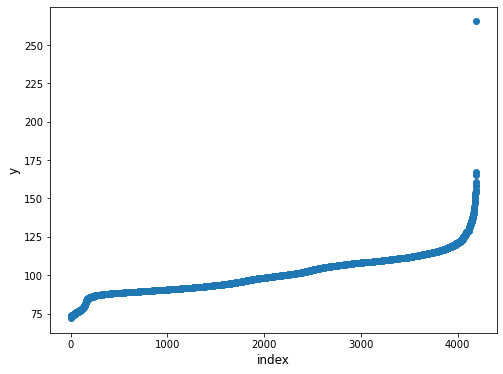

In [17]:
#Target Variable:"y" is the variable we need to predict.
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

<h4>Check and Remove Columns not present in either Test or Train

In [18]:
print('Columns in train_df not in test_df = ', train_df.columns.difference(test_df.columns))
print('Columns in test_df not in train_df = ', test_df.columns.difference(train_df.columns))

Columns in train_df not in test_df =  Index(['X257', 'X258', 'X295', 'X296', 'X369', 'y'], dtype='object')
Columns in test_df not in train_df =  Index(['X107', 'X11', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297',
       'X330', 'X347', 'X93'],
      dtype='object')


In [19]:
#Fetching Y
train_data_target = train_df['y']
for col in train_df.columns.difference(test_df.columns):
    del train_df[col]
for col in test_df.columns.difference(train_df.columns):
    del test_df[col]
print('Columns in train_df not in test_df = ', train_df.columns.difference(test_df.columns))
print('Columns in test_df not in train_df = ', test_df.columns.difference(train_df.columns))

Columns in train_df not in test_df =  Index([], dtype='object')
Columns in test_df not in train_df =  Index([], dtype='object')


In [20]:
print("Train shape : ", train_df.shape)
#print("\n\nTrain Head\n", train_df.head())
print("\n\nTest shape : ", test_df.shape)
#print("\n\nTest Head\n", test_df.head())

Train shape :  (4196, 360)


Test shape :  (4184, 360)


<h4>Removing ID for later use

In [21]:
train_data_id_source = train_df['ID']
train_data_features = train_df.drop(['ID'],axis = 1)
print('Train features shape = ', train_data_features.shape)
print('Train target shape = ', train_data_target.shape)
test_data_id_source = test_df['ID']
test_data_features = test_df.drop(['ID'],axis = 1)
print('Train features shape = ', test_data_features.shape)

Train features shape =  (4196, 359)
Train target shape =  (4196,)
Train features shape =  (4184, 359)


<h4>Apply Label Encoding in both Train and Test

In [22]:
#Type2 Apply Label encoding on all DF 
from collections import defaultdict
d = defaultdict(LabelEncoder)

train_data_features = train_data_features.apply(lambda x: d[x.name].fit_transform(x))
test_data_features = test_data_features.apply(lambda x: d[x.name].transform(x))

In [23]:
print("Train shape : ", train_data_features.shape)
print("\n\nTrain Head\n", train_data_features.head())
print("\n\nTest shape : ", test_data_features.shape)
print("\n\nTest Head\n", test_data_features.head())

Train shape :  (4196, 359)


Train Head
    X0  X1  X2  X3  X4  X5  X6  X8  X10  X12  ...  X375  X376  X377  X378  \
2  17  24  29   2   3  26   9  23    0    0  ...     0     0     0     0   
3  17  21  29   5   3  26  11   4    0    0  ...     0     0     0     0   
4  17  23  29   5   3  12   3  13    0    0  ...     0     0     0     0   
5  36   3  21   2   3  11   7  18    0    0  ...     0     0     1     0   
6   6  19  21   5   3  10   7  18    0    0  ...     0     0     0     0   

   X379  X380  X382  X383  X384  X385  
2     0     0     1     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  
5     0     0     0     0     0     0  
6     0     0     0     0     0     0  

[5 rows x 359 columns]


Test shape :  (4184, 359)


Test Head
    X0  X1  X2  X3  X4  X5  X6  X8  X10  X12  ...  X375  X376  X377  X378  \
5  41   1   6   4   3  26   6  18    0    0  ...     1     0     0     0   
6  40   3   2   3   3  26   3  24    0    0  

<h4>Splitting Train Data for Modeling

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data_features, train_data_target, test_size=0.2,random_state=4242)
print('X_train dataset shape = ', X_train.shape)
print('Y_train dataset shape = ', Y_train.shape)
print('X_test dataset shape = ', X_test.shape)
print('Y_test dataset shape = ', Y_test.shape)

X_train dataset shape =  (3356, 359)
Y_train dataset shape =  (3356,)
X_test dataset shape =  (840, 359)
Y_test dataset shape =  (840,)


In [25]:
def model_fit_transform_accuracy(model,xtrain,ytrain,xtest,ytest):
    model.fit(xtrain,ytrain);
    return_array = []
    return_array.append(model)
    model_train_predict = model.predict(xtrain)
    return_array.append("{:.2f}".format(np.sqrt(mean_squared_error(ytrain, model_train_predict))))
    return_array.append("{:.2f}".format(r2_score(ytrain, model_train_predict)))
    model_test_predict = model.predict(xtest)
    return_array.append("{:.2f}".format(np.sqrt(mean_squared_error(ytest, model_test_predict))))
    return_array.append("{:.2f}".format(r2_score(ytest, model_test_predict)))
    
    #return_array.append(model_train_predict)
    #return_array.append(model_test_predict)

    return return_array

## Additional Regression Along with XGB

<h4>Liner Regression

In [26]:
initial_lin_model = LinearRegression()
initial_lin_model = model_fit_transform_accuracy(initial_lin_model, X_train, Y_train, X_test, Y_test)
initial_lin_model

[LinearRegression(), '8.05', '0.59', '8441095233.52', '-446186765158222656.00']

----> Looks good on testing set by not good on training

<h4>Ridge Regression

In [27]:
initial_ridge_model = Ridge(alpha=0.001, normalize=True)
initial_ridge_model = model_fit_transform_accuracy(initial_ridge_model, X_train, Y_train, X_test, Y_test)
initial_ridge_model

[Ridge(alpha=0.001, normalize=True), '8.06', '0.59', '8.70', '0.53']

----> Looks optimal on both Testing and Training

<h4>Lasso Regression

In [28]:
initial_lasso_model = Lasso(alpha=0.001, normalize=True,max_iter = 10000)
initial_lasso_model = model_fit_transform_accuracy(initial_lasso_model, X_train, Y_train, X_test, Y_test)
initial_lasso_model

[Lasso(alpha=0.001, max_iter=10000, normalize=True),
 '8.17',
 '0.58',
 '8.44',
 '0.55']

----> Looks optimal on both Testing and Training

<h1>XGB Model

<h4> XGB Regressor

In [29]:
initial_xgb_reg_model = XGBRegressor(n_estimators=500,booster='gbtree',learning_rate=0.1,importance_type='gain',max_delta_step=0, max_depth=2,min_child_weight=3,objective='reg:squarederror',reg_lambda=10,seed=2)
initial_xgb_reg_model = model_fit_transform_accuracy(initial_xgb_reg_model, X_train, Y_train, X_test, Y_test)
initial_xgb_reg_model

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None),
 '7.76',
 '0.62',
 '8.30',
 '0.57']

----> Good Comparing to Linear / Ridge / Lasso

<h4>Find best XGBoost Parameters using RandomizedSearchCV

In [30]:
#To find best XGBoost Parameters
params={ 'learning_rate'   : [0.01,0.05,0.1,1] ,
         'max_depth'       : [2,3,5,10],
         'min_child_weight': [ 0, 1, 3],
         'n_estimators'    : [100,150,200,500],
         'gamma'           : [1e-2,1e-3,0,0.1,0.01,0.5,1],
         'colsample_bytree': [0.1,0.5,0.7,1],
         'subsample'       : [0.2,0.3,0.5,1],
         'reg_lambda'      : [0,1,10],
         'reg_alpha'       : [1e-5,1e-3,1e-1,1,1e1] 
        }

# Optimize the Hyperparameter using RandomizedSearchCV
# Using Random search of parameters with 10 fold cross validation
# Improve the predictions using cross validation to optimize the parameters
# cv=10 - Number of folds in a `(Stratified)KFold`
from sklearn.model_selection import RandomizedSearchCV
Random_Search=RandomizedSearchCV (initial_xgb_reg_model[0],params,cv=10, scoring='r2', return_train_score=True, n_jobs=-1,verbose=1) 

#Fit the training set to the Randon_Search to obtain the best estimators and parameters.
Random_Search.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=2, min_child_weight=3,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=500, n_jobs=4,
                                          num_parallel_t...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                     

In [31]:
# Print the best estimator
Random_Search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.1, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2,
             reg_alpha=10.0, reg_lambda=1, scale_pos_weight=1, seed=2,
             subsample=0.5, tree_method='exact', validate_parameters=1,
             verbosity=None)

<h4>Apply Best Parameters and Retry XGB

In [32]:
initial_xgb_reg_best_param = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=2,
             reg_alpha=1e-05, reg_lambda=10, scale_pos_weight=1, seed=2,
             subsample=0.2, tree_method='exact', validate_parameters=1,
             verbosity=None)

initial_xgb_reg_best_param = model_fit_transform_accuracy(initial_xgb_reg_best_param, X_train, Y_train, X_test, Y_test)
initial_xgb_reg_best_param

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=1e-05, reg_lambda=10, scale_pos_weight=1, seed=2,
              subsample=0.2, tree_method='exact', validate_parameters=1,
              verbosity=None),
 '7.99',
 '0.60',
 '8.22',
 '0.58']

# Appling PCA on All Data set

<h4>Perform Dimensionality Reduction on the entire dataset

In [33]:
n_comp = 150
pca = PCA(n_components=n_comp, random_state=420)
pca_train_train = pca.fit_transform(X_train)
pca_train_test = pca.transform(X_test)
pca_test_test = pca.transform(test_data_features)
print("PCA Train shape : ", pca_train_train.shape)
print("PCA Test (Train) shape : ", pca_train_test.shape)
print("PCA Actual Test shape : ", pca_test_test.shape)
#print("PCA explained_variance_ratio_ : ", pca.explained_variance_ratio_)
#print("PCA explained_variance_ratio_ : ", pca.explained_variance_)
#print("PCA explained_variance_ratio_ : ", pca.components_)

PCA Train shape :  (3356, 150)
PCA Test (Train) shape :  (840, 150)
PCA Actual Test shape :  (4184, 150)


<h4>LinearRegression after perfroming PCA

In [34]:
pca_lin_model = LinearRegression()
pca_lin_model = model_fit_transform_accuracy(pca_lin_model, pca_train_train, Y_train, pca_train_test, Y_test)
pca_lin_model

[LinearRegression(), '8.16', '0.58', '8.54', '0.54']

<h4>Ridge Regression on PCA Data

In [35]:
pca_ridge_model = Ridge(alpha=0.001, normalize=True)
pca_ridge_model = model_fit_transform_accuracy(pca_ridge_model, pca_train_train, Y_train, pca_train_test, Y_test)
pca_ridge_model

[Ridge(alpha=0.001, normalize=True), '8.16', '0.58', '8.54', '0.54']

<h4>Lasso Regression on PCA Data

In [36]:
pca_lasso_model = Lasso(alpha=0.001, normalize=True)
pca_lasso_model = model_fit_transform_accuracy(pca_lasso_model, pca_train_train, Y_train, pca_train_test, Y_test)
pca_lasso_model

[Lasso(alpha=0.001, normalize=True), '8.18', '0.58', '8.49', '0.55']

<h1>XGB

<h4>XGBRegressor on PCA Data

In [37]:
pca_xgb_reg_model = XGBRegressor(n_estimators=500,booster='gbtree',learning_rate=0.1,importance_type='gain',max_delta_step=0, max_depth=2,min_child_weight=3,objective='reg:squarederror',reg_lambda=10,seed=2)
pca_xgb_reg_model = model_fit_transform_accuracy(pca_xgb_reg_model, pca_train_train, Y_train, pca_train_test, Y_test)
pca_xgb_reg_model

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None),
 '6.59',
 '0.73',
 '8.63',
 '0.53']

<h4>Find best XGBoost Parameters using RandomizedSearchCV

In [38]:
#To find best XGBoost Parameters
params={ 'learning_rate'   : [0.01,0.05,0.1,1] ,
         'max_depth'       : [2,3,5,10],
         'min_child_weight': [ 0, 1, 3],
         'n_estimators'    : [100,150,200,500],
         'gamma'           : [1e-2,1e-3,0,0.1,0.01,0.5,1],
         'colsample_bytree': [0.1,0.5,0.7,1],
         'subsample'       : [0.2,0.3,0.5,1],
         'reg_lambda'      : [0,1,10],
         'reg_alpha'       : [1e-5,1e-3,1e-1,1,1e1] 
        }

# Optimize the Hyperparameter using RandomizedSearchCV
# Using Random search of parameters with 10 fold cross validation
# Improve the predictions using cross validation to optimize the parameters
# cv=10 - Number of folds in a `(Stratified)KFold`
from sklearn.model_selection import RandomizedSearchCV
Random_Search=RandomizedSearchCV (pca_xgb_reg_model[0],params,cv=10, scoring='r2', return_train_score=True, n_jobs=-1,verbose=1) 

#Fit the training set to the Randon_Search to obtain the best estimators and parameters.
Random_Search.fit(pca_train_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=2, min_child_weight=3,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=500, n_jobs=4,
                                          num_parallel_t...
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.5, 0.7, 1],
                                     

In [39]:
# Print the best estimator
Random_Search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=2,
             reg_alpha=10.0, reg_lambda=1, scale_pos_weight=1, seed=2,
             subsample=0.3, tree_method='exact', validate_parameters=1,
             verbosity=None)

<h4>Apply Best Parameters and Retry XGB

In [40]:
pca_xgb_reg_best_param = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=1, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2,
             reg_alpha=1e-05, reg_lambda=10, scale_pos_weight=1, seed=2,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)
pca_xgb_reg_best_param = model_fit_transform_accuracy(pca_xgb_reg_best_param, pca_train_train, Y_train, pca_train_test, Y_test)
pca_xgb_reg_best_param

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=1e-05, reg_lambda=10, scale_pos_weight=1, seed=2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None),
 '7.22',
 '0.67',
 '8.88',
 '0.51']

# Applying PCA only on Binary features and merging with Categorical features

### Splitting Categorical values from Train/Validation and Final prediction data

In [41]:
#X_train, X_test, Y_train, Y_test
X_train_categ_features = X_train[categorical_objects]
X_test_categ_features = X_test[categorical_objects]
final_test_categ_features = test_data_features[categorical_objects]

X_train_binary = X_train.drop(categorical_objects, axis=1)
X_test_binary = X_test.drop(categorical_objects, axis=1)
final_test_binary = test_data_features.drop(categorical_objects, axis=1)

In [42]:
X_train_categ_features = X_train_categ_features.reset_index(drop=True)
X_test_categ_features = X_test_categ_features.reset_index(drop=True)
final_test_categ_features = final_test_categ_features.reset_index(drop=True)
X_train_binary = X_train_binary.reset_index(drop=True)
X_test_binary = X_test_binary.reset_index(drop=True)
final_test_binary = final_test_binary.reset_index(drop=True)

In [43]:
print('X_train_categ_features dataset shape = ', X_train_categ_features.shape)
print('X_test_categ_features dataset shape = ', X_test_categ_features.shape)
print('final_test_categ_features dataset shape = ', final_test_categ_features.shape)
print('X_train_binary dataset shape = ', X_train_binary.shape)
print('X_test_binary dataset shape = ', X_test_binary.shape)
print('final_test_binary dataset shape = ', final_test_binary.shape)

X_train_categ_features dataset shape =  (3356, 8)
X_test_categ_features dataset shape =  (840, 8)
final_test_categ_features dataset shape =  (4184, 8)
X_train_binary dataset shape =  (3356, 351)
X_test_binary dataset shape =  (840, 351)
final_test_binary dataset shape =  (4184, 351)


In [44]:
#%_bin => Binary
#%_cat => Categorical
#%_bin_cat => (PCA)Binary + Categorical

n_comp_bin = .95
pca = PCA(n_components=n_comp_bin, random_state=420)
pca_train_train_bin = pca.fit_transform(X_train_binary)
pca_train_test_bin = pca.transform(X_test_binary)
pca_test_test_bin = pca.transform(final_test_binary)
print("PCA Binary Train shape : ", pca_train_train_bin.shape, "DType : ", type(pca_train_train_bin))
print("PCA Binary Test (Train) shape : ", pca_train_test_bin.shape, "DType : ", type(pca_train_test_bin))
print("PCA Binary Actual Test shape : ", pca_test_test_bin.shape, "DType : ", type(pca_test_test_bin))

PCA Binary Train shape :  (3356, 71) DType :  <class 'numpy.ndarray'>
PCA Binary Test (Train) shape :  (840, 71) DType :  <class 'numpy.ndarray'>
PCA Binary Actual Test shape :  (4184, 71) DType :  <class 'numpy.ndarray'>


### Converting Array to DataFrame for merging Binary to Categorical

In [45]:
pca_train_train_bin = pd.DataFrame(pca_train_train_bin)
pca_train_test_bin = pd.DataFrame(pca_train_test_bin)
pca_test_test_bin = pd.DataFrame(pca_test_test_bin)

In [46]:
print("PCA Binary Train shape : ", pca_train_train_bin.shape, "DType : ", type(pca_train_train_bin))
print("PCA Binary Test (Train) shape : ", pca_train_test_bin.shape, "DType : ", type(pca_train_test_bin))
print("PCA Binary Actual Test shape : ", pca_test_test_bin.shape, "DType : ", type(pca_test_test_bin))

PCA Binary Train shape :  (3356, 71) DType :  <class 'pandas.core.frame.DataFrame'>
PCA Binary Test (Train) shape :  (840, 71) DType :  <class 'pandas.core.frame.DataFrame'>
PCA Binary Actual Test shape :  (4184, 71) DType :  <class 'pandas.core.frame.DataFrame'>


### Concat Binary and Categorical features

In [47]:
X_train_pca_bin_cat = pd.concat([X_train_categ_features, pca_train_train_bin],axis=1)
X_test_pca_bin_cat =  pd.concat([X_test_categ_features, pca_train_test_bin],axis=1)
final_test_pca_bin_cat = pd.concat([final_test_categ_features, pca_test_test_bin],axis=1)
print("PCA Binary & Categorical Train shape : ", X_train_pca_bin_cat.shape, "DType : ", type(X_train_pca_bin_cat))
print("PCA Binary & Categorical Test (Train) shape : ", X_test_pca_bin_cat.shape, "DType : ", type(X_test_pca_bin_cat))
print("PCA Binary & Categorical Actual Test shape : ", final_test_pca_bin_cat.shape, "DType : ", type(final_test_pca_bin_cat))

PCA Binary & Categorical Train shape :  (3356, 79) DType :  <class 'pandas.core.frame.DataFrame'>
PCA Binary & Categorical Test (Train) shape :  (840, 79) DType :  <class 'pandas.core.frame.DataFrame'>
PCA Binary & Categorical Actual Test shape :  (4184, 79) DType :  <class 'pandas.core.frame.DataFrame'>


<h4>Linear Regression

In [48]:
lin_model_pca_bin_cat = LinearRegression()
lin_model_pca_bin_cat = model_fit_transform_accuracy(lin_model_pca_bin_cat, X_train_pca_bin_cat, Y_train, X_test_pca_bin_cat, Y_test)
lin_model_pca_bin_cat

[LinearRegression(), '8.38', '0.56', '8.59', '0.54']

<h4>Ridge Regression

In [49]:
ridge_model_pca_bin_cat = Ridge(alpha=0.001, normalize=True)
ridge_model_pca_bin_cat = model_fit_transform_accuracy(ridge_model_pca_bin_cat, X_train_pca_bin_cat, Y_train, X_test_pca_bin_cat, Y_test)
ridge_model_pca_bin_cat

[Ridge(alpha=0.001, normalize=True), '8.38', '0.56', '8.59', '0.54']

<h4>Lasso Regression

In [50]:
lasso_model_pca_bin_cat = Lasso(alpha=0.001, normalize=True,max_iter = 10000)
lasso_model_pca_bin_cat = model_fit_transform_accuracy(lasso_model_pca_bin_cat, X_train_pca_bin_cat, Y_train, X_test_pca_bin_cat, Y_test)
lasso_model_pca_bin_cat

[Lasso(alpha=0.001, max_iter=10000, normalize=True),
 '8.40',
 '0.55',
 '8.61',
 '0.54']

<h4>XGBRegressor

In [51]:
xgb_reg_model_pca_bin_cat = XGBRegressor(n_estimators=500,booster='gbtree',learning_rate=0.1,importance_type='gain',max_delta_step=0, max_depth=2,min_child_weight=3,objective='reg:squarederror',reg_lambda=10,seed=2)
xgb_reg_model_pca_bin_cat = model_fit_transform_accuracy(xgb_reg_model_pca_bin_cat, X_train_pca_bin_cat, Y_train, X_test_pca_bin_cat, Y_test)
xgb_reg_model_pca_bin_cat

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None),
 '6.86',
 '0.70',
 '8.58',
 '0.54']

<h4>XGBRegressor with Bes Params

In [52]:
#To find best XGBoost Parameters
params={ 'learning_rate'   : [0.01,0.05,0.1,1] ,
         'max_depth'       : [2,3,5,10],
         'min_child_weight': [ 0, 1, 3],
         'n_estimators'    : [100,150,200,500],
         'gamma'           : [1e-2,1e-3,0,0.1,0.01,0.5,1],
         'colsample_bytree': [0.1,0.5,0.7,1],
         'subsample'       : [0.2,0.3,0.5,1],
         'reg_lambda'      : [0,1,10],
         'reg_alpha'       : [1e-5,1e-3,1e-1,1,1e1] 
        }

# Optimize the Hyperparameter using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Using Random search of parameters with 10 fold cross validation
# Improve the predictions using cross validation to optimize the parameters
Random_Search=RandomizedSearchCV (xgb_reg_model_pca_bin_cat[0],params,cv=10, scoring='r2', return_train_score=True, n_jobs=-1,verbose=1) 
# cv=10 - Number of folds in a `(Stratified)KFold`
#Fit the training set to the Randon_Search to obtain the best estimators and parameters.
Random_Search.fit(X_train_pca_bin_cat,Y_train)
# Print the best estimator
Random_Search.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=2,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=1, seed=2,
             subsample=0.3, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [53]:
xgb_reg_pca_bin_cat_best_param = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.01, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=0, missing=1, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2,
             reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=2,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

xgb_reg_pca_bin_cat_best_param = model_fit_transform_accuracy(xgb_reg_pca_bin_cat_best_param, X_train_pca_bin_cat, Y_train, X_test_pca_bin_cat, Y_test)
xgb_reg_pca_bin_cat_best_param

[XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.01, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=0, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=2,
              reg_alpha=0.001, reg_lambda=1, scale_pos_weight=1, seed=2,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None),
 '8.02',
 '0.59',
 '8.80',
 '0.52']

## Overall Summary

In [59]:
from IPython.display import HTML, display
summary="<html><STYLE TYPE='text/css'> <!-- TD{font-family: Courier New; font-size: 10pt;} TH{font-family: Courier New; font-size: 10pt; color: white; background-color: #1E90FF;} ---> </STYLE></head><body><font face='courier new' size='2'><br><br></body></html> <table border='2' BORDERCOLOR='#495531'> \
<tr><th rowspan=2>Dimensionality Reduction</th><th rowspan=2>Model</th><th colspan=2>Train</th><th colspan=2>Validation</th></tr> \
<tr><th>RMSE</th><th>R2 Score</th><th>RMSE</th><th>R2 Score</th></tr> \
<tr align='center'><th rowspan=5>Regression without PCA</td><th>Linear Regression</th><td>"+ initial_lin_model[1] +"</td><td>"+ initial_lin_model[2] +"</td><td>"+ initial_lin_model[3] +"</td><td>"+ initial_lin_model[4] +"</td></tr> \
<tr align='center'><th>Ridge Regression</td><td>"+ initial_ridge_model[1] +"</td><td>"+ initial_ridge_model[2] +"</td><td>"+ initial_ridge_model[3] +"</td><td>"+ initial_ridge_model[4] +"</td></tr> \
<tr align='center'><th>Lasso Regression</td><td>"+ initial_lasso_model[1] +"</td><td>"+ initial_lasso_model[2] +"</td><td>"+ initial_lasso_model[3] +"</td><td>"+ initial_lasso_model[4] +"</td></tr> \
<tr align='center'><th>XGB Regressor</td><td>"+ initial_xgb_reg_model[1] +"</td><td>"+ initial_xgb_reg_model[2] +"</td><td>"+ initial_xgb_reg_model[3] +"</td><td>"+ initial_xgb_reg_model[4] +"</td></tr> \
<tr align='center'><th>XGBRegressor <br> with best param</td><td>"+ initial_xgb_reg_best_param[1] +"</td><td>"+ initial_xgb_reg_best_param[2] +"</td><td>"+ initial_xgb_reg_best_param[3] +"</td><td>"+ initial_xgb_reg_best_param[4] +"</td></tr> \
<tr align='center'><th rowspan=5>PCA with "+ str(round(n_comp, 2)) + " Components</th><th>Linear Regression</td><td>"+ pca_lin_model[1] +"</td><td>"+ pca_lin_model[2] +"</td><td>"+ pca_lin_model[3] +"</td><td>"+ pca_lin_model[4] +"</td></tr> \
<tr align='center'><th>Ridge Regression</th><td>"+ pca_ridge_model[1] +"</td><td>"+ pca_ridge_model[2] +"</td><td>"+ pca_ridge_model[3] +"</td><td>"+ pca_ridge_model[4] +"</td></tr> \
<tr align='center'><th>Lasso Regression</th><td>"+ pca_lasso_model[1] +"</td><td>"+ pca_lasso_model[2] +"</td><td>"+ pca_lasso_model[3] +"</td><td>"+ pca_lasso_model[4] +"</td></tr> \
<tr align='center'><th>XGB Regressor</th><td>"+ pca_xgb_reg_model[1] +"</td><td>"+ pca_xgb_reg_model[2] +"</td><td>"+ pca_xgb_reg_model[3] +"</td><td>"+ pca_xgb_reg_model[4] +"</td></tr> \
<tr align='center'><th>XGBRegressor <br> with best param</th><td>"+ pca_xgb_reg_best_param[1] +"</td><td>"+ pca_xgb_reg_best_param[2] +"</td><td>"+ pca_xgb_reg_best_param[3] +"</td><td>"+ pca_xgb_reg_best_param[4] +"</td></tr> \
<tr align='center'><th rowspan=5>PCA only on Binary features<br> and merging with <br>Categorical features</th><th>Linear Regression</th><td>"+ lin_model_pca_bin_cat[1] +"</td><td>"+ lin_model_pca_bin_cat[2] +"</td><td>"+ lin_model_pca_bin_cat[3] +"</td><td>"+ lin_model_pca_bin_cat[4] +"</td></tr> \
<tr align='center'><th>Ridge Regression</th><td>"+ ridge_model_pca_bin_cat[1] +"</td><td>"+ ridge_model_pca_bin_cat[2] +"</td><td>"+ ridge_model_pca_bin_cat[3] +"</td><td>"+ ridge_model_pca_bin_cat[4] +"</td></tr> \
<tr align='center'><th>Lasso Regression</th><td>"+ lasso_model_pca_bin_cat[1] +"</td><td>"+ lasso_model_pca_bin_cat[2] +"</td><td>"+ lasso_model_pca_bin_cat[3] +"</td><td>"+ lasso_model_pca_bin_cat[4] +"</td></tr> \
<tr align='center'><th>XGB Regressor</th><td>"+ xgb_reg_model_pca_bin_cat[1] +"</td><td>"+ xgb_reg_model_pca_bin_cat[2] +"</td><td>"+ xgb_reg_model_pca_bin_cat[3] +"</td><td>"+ xgb_reg_model_pca_bin_cat[4] +"</td></tr> \
<tr align='center'><th>XGBRegressor Best Param</th><td>"+ xgb_reg_pca_bin_cat_best_param[1] +"</td><td>"+ xgb_reg_pca_bin_cat_best_param[2] +"</td><td>"+ xgb_reg_pca_bin_cat_best_param[3] +"</td><td>"+ xgb_reg_pca_bin_cat_best_param[4] +"</td></tr> \
<table></body></html>"
display(HTML(summary))

# Predict Y using all above models

In [55]:
initial_lin_model_y = initial_lin_model[0].predict(test_data_features)
initial_ridge_model_y = initial_ridge_model[0].predict(test_data_features)
initial_lasso_model_y = initial_lasso_model[0].predict(test_data_features)
initial_xgb_reg_model_y = initial_xgb_reg_model[0].predict(test_data_features)
initial_xgb_reg_bestparam_y = initial_xgb_reg_best_param[0].predict(test_data_features)
pca_lin_model_y = pca_lin_model[0].predict(pca_test_test)
pca_ridge_model_y = pca_ridge_model[0].predict(pca_test_test)
pca_lasso_model_y = pca_lasso_model[0].predict(pca_test_test)
pca_xgb_reg_model_y = pca_xgb_reg_model[0].predict(pca_test_test)
pca_xgb_reg_bestparam_y = pca_xgb_reg_best_param[0].predict(pca_test_test)
pca_bin_cat_lin_model_y = lin_model_pca_bin_cat[0].predict(final_test_pca_bin_cat)
pca_bin_cat_ridge_model_y = ridge_model_pca_bin_cat[0].predict(final_test_pca_bin_cat)
pca_bin_cat_lasso_model_y = lasso_model_pca_bin_cat[0].predict(final_test_pca_bin_cat)
pca_bin_cat_xgb_reg_model_y = xgb_reg_model_pca_bin_cat[0].predict(final_test_pca_bin_cat)
pca_bin_cat_xgb_reg_bestparam_y = xgb_reg_pca_bin_cat_best_param[0].predict(final_test_pca_bin_cat)

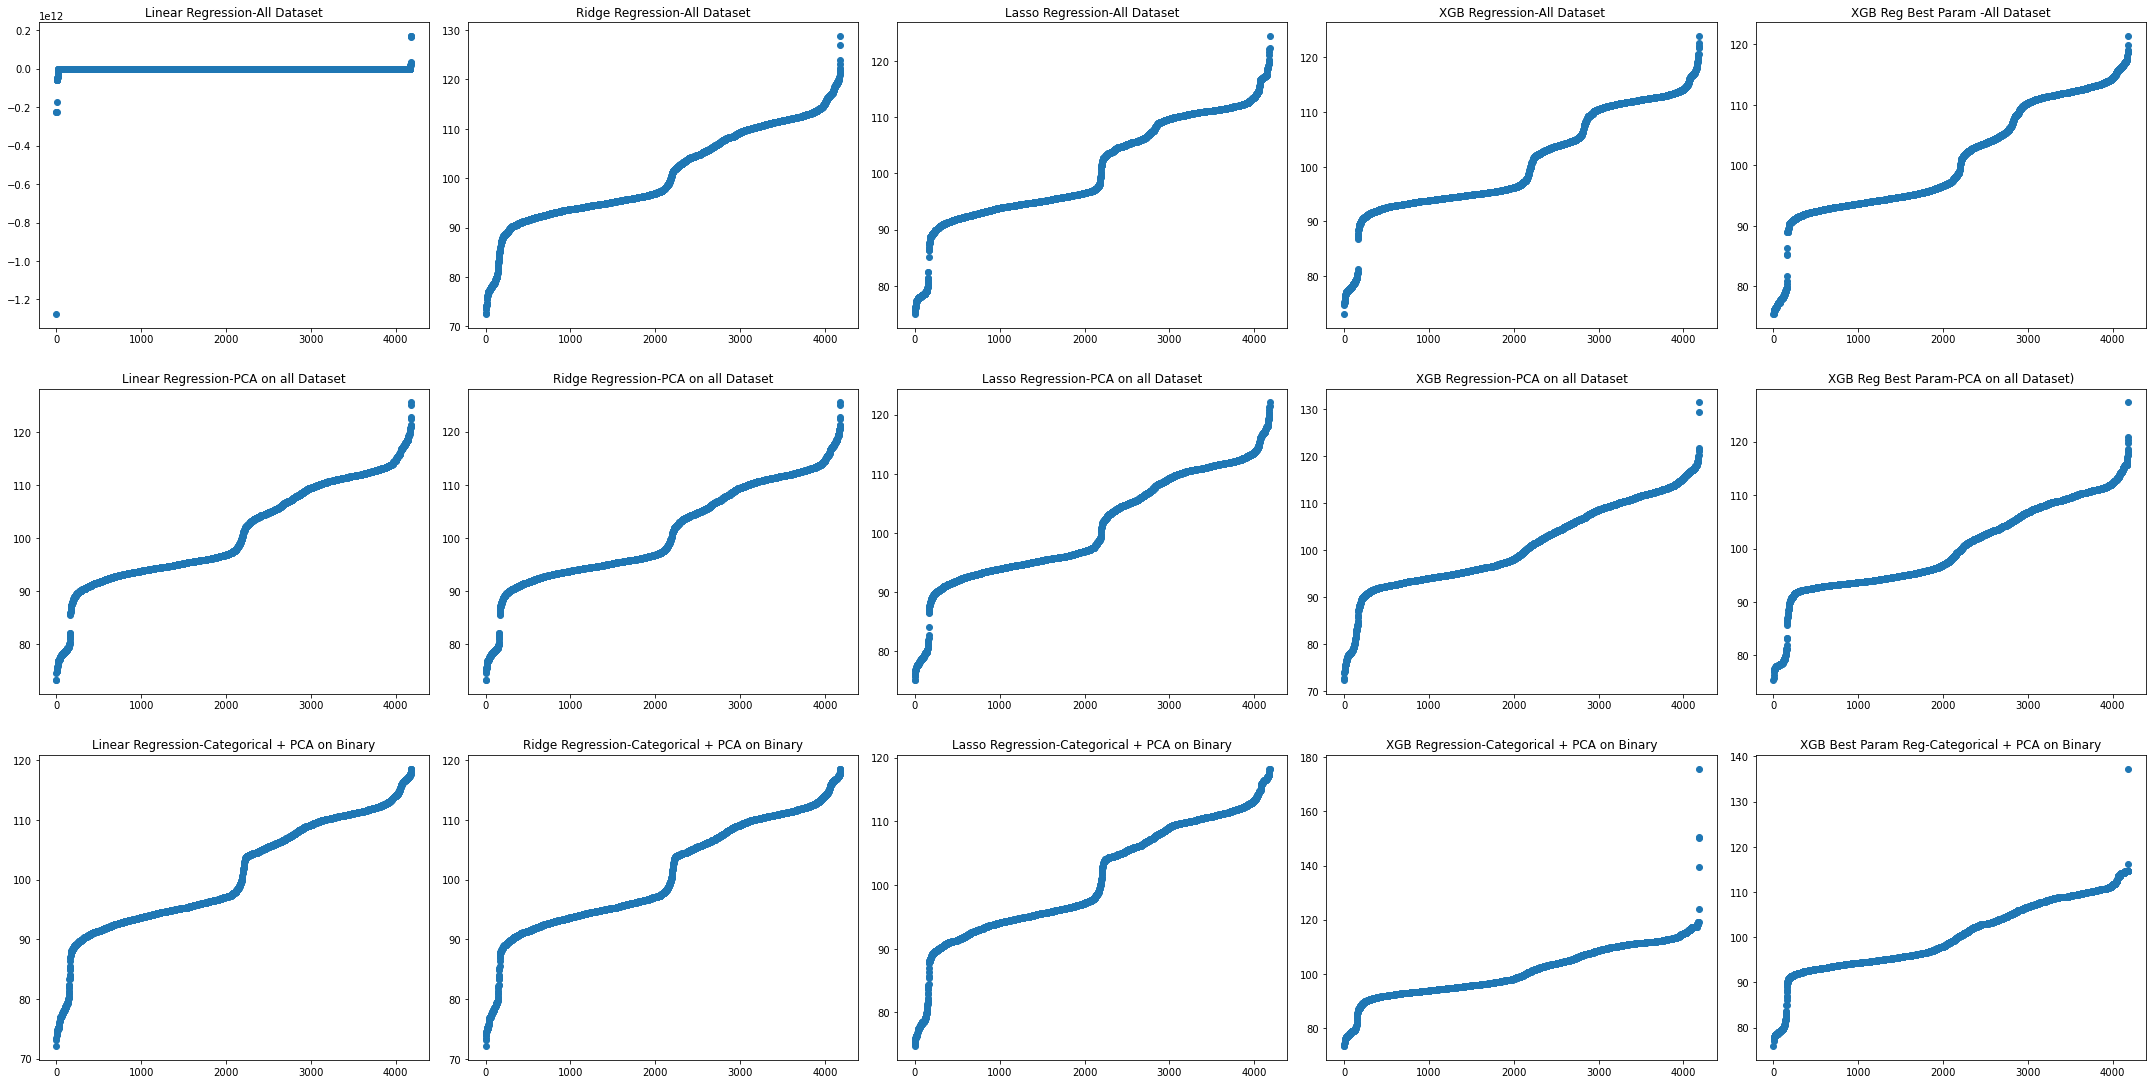

In [56]:
fig, ((ax1,ax2,ax3,ax4,ax5),(ax6,ax7,ax8,ax9,ax10),(ax11,ax12,ax13,ax14,ax15)) = plt.subplots(nrows=3, ncols=5, figsize=(30, 15))
fig.tight_layout()
ax1.scatter(range(initial_lin_model_y.shape[0]), np.sort(initial_lin_model_y))
ax1.set_title("Linear Regression-All Dataset")

ax2.scatter(range(initial_ridge_model_y.shape[0]), np.sort(initial_ridge_model_y))
ax2.set_title("Ridge Regression-All Dataset")

ax3.scatter(range(initial_lasso_model_y.shape[0]), np.sort(initial_lasso_model_y))
ax3.set_title("Lasso Regression-All Dataset")

ax4.scatter(range(initial_xgb_reg_model_y.shape[0]), np.sort(initial_xgb_reg_model_y))
ax4.set_title("XGB Regression-All Dataset")

ax5.scatter(range(initial_xgb_reg_bestparam_y.shape[0]), np.sort(initial_xgb_reg_bestparam_y))
ax5.set_title("XGB Reg Best Param -All Dataset")

ax6.scatter(range(pca_lin_model_y.shape[0]), np.sort(pca_lin_model_y))
ax6.set_title("Linear Regression-PCA on all Dataset")

ax7.scatter(range(pca_ridge_model_y.shape[0]), np.sort(pca_ridge_model_y))
ax7.set_title("Ridge Regression-PCA on all Dataset")

ax8.scatter(range(pca_lasso_model_y.shape[0]), np.sort(pca_lasso_model_y))
ax8.set_title("Lasso Regression-PCA on all Dataset")

ax9.scatter(range(pca_xgb_reg_model_y.shape[0]), np.sort(pca_xgb_reg_model_y))
ax9.set_title("XGB Regression-PCA on all Dataset")

ax10.scatter(range(pca_xgb_reg_bestparam_y.shape[0]), np.sort(pca_xgb_reg_bestparam_y))
ax10.set_title("XGB Reg Best Param-PCA on all Dataset)")

ax11.scatter(range(pca_bin_cat_lin_model_y.shape[0]), np.sort(pca_bin_cat_lin_model_y))
ax11.set_title("Linear Regression-Categorical + PCA on Binary")

ax12.scatter(range(pca_bin_cat_ridge_model_y.shape[0]), np.sort(pca_bin_cat_ridge_model_y))
ax12.set_title("Ridge Regression-Categorical + PCA on Binary")

ax13.scatter(range(pca_bin_cat_lasso_model_y.shape[0]), np.sort(pca_bin_cat_lasso_model_y))
ax13.set_title("Lasso Regression-Categorical + PCA on Binary")

ax14.scatter(range(pca_bin_cat_xgb_reg_model_y.shape[0]), np.sort(pca_bin_cat_xgb_reg_model_y))
ax14.set_title("XGB Regression-Categorical + PCA on Binary")

ax15.scatter(range(pca_bin_cat_xgb_reg_bestparam_y.shape[0]), np.sort(pca_bin_cat_xgb_reg_bestparam_y))
ax15.set_title("XGB Best Param Reg-Categorical + PCA on Binary")



fig.subplots_adjust(wspace=0.10,hspace=0.2)

plt.show()

### Based on above regression models XGB Regression with PCA on all dataset looks best possible  (Row : 2, Column : 4)

<h1>Applying Model on Test Data

In [57]:
test_df['y'] = pca_xgb_reg_model_y
test_df['y']  = test_df['y'].apply(lambda x: round(x, 2))
test_df = test_df.reset_index(drop=True)
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X376,X377,X378,X379,X380,X382,X383,X384,X385,y
0,8,y,aa,ai,e,d,x,g,s,0,...,0,0,0,0,0,0,0,0,0,92.75
1,10,x,b,ae,d,d,x,d,y,0,...,0,0,0,0,1,0,0,0,0,114.42
2,11,f,s,ae,c,d,h,d,a,0,...,0,1,0,0,0,0,0,0,0,93.82
3,12,ap,l,s,c,d,h,j,n,0,...,0,0,0,0,0,0,0,0,0,117.27
4,14,o,v,as,f,d,g,f,v,0,...,0,0,0,0,0,0,0,0,0,97.57


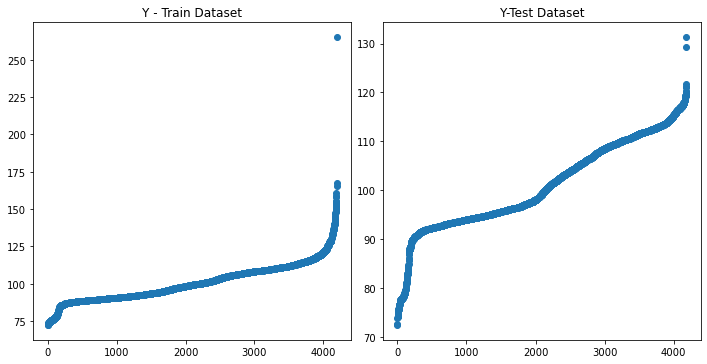

In [58]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.tight_layout()
ax1.scatter(range(train_data_target.shape[0]), np.sort(train_data_target))
ax1.set_title("Y - Train Dataset")

ax2.scatter(range(test_df.shape[0]), np.sort(test_df.y.values))
ax2.set_title("Y-Test Dataset")
fig.subplots_adjust(wspace=0.10,hspace=0.2)

plt.show()

<h1>End of Project